-------------------- 
#### Aim : Describe class imbalance issue

- datasets
    - dummy
    - credit card fraud
- options
    - use class-weight parameter of Logistic regression
    - use `SMOTE`
    - ROS
    
-----------------------

In [3]:
# basic libraries
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.datasets import make_blobs, make_classification

##### 1. dummy dataset

In [24]:
# create a imbalanced dataset of 10K with 2 class
X, y = make_classification(n_samples    = 10000         # number of samples
                          ,n_features   = 2             # feature/label count
                          ,n_informative= 2             # informative features
                          ,n_redundant  = 0             # redundant features
                          ,n_repeated   = 0             # duplicate features
                          ,n_clusters_per_class=1       # number of clusters per class; clusters during plotting
                          ,weights      = [0.99]        # proportions of samples assigned to each class
                          ,flip_y       = 0             # fraction of samples whose class is assigned randomly. 
                          ,random_state = 13
                          ,class_sep    = .3
                          ,n_classes    = 2)            # change the class_sep to 1 or 0.5 to infuse lower separability

In [25]:
np.unique(y)

array([0, 1])

In [26]:
# club together into a dataframe
df = pd.DataFrame(X, columns=['x1','x2'])
df['y'] = y

df.head()

,x1,x2,y
0,-1.211993,0.542198,0
1,0.384230,-0.121678,0
2,-0.806794,0.446743,0
3,0.659971,-0.233430,0
4,-0.720019,0.351144,0


In [27]:
# check the distribution
df['y'].value_counts()/df.shape[0]

0    0.99
1    0.01
Name: y, dtype: float64

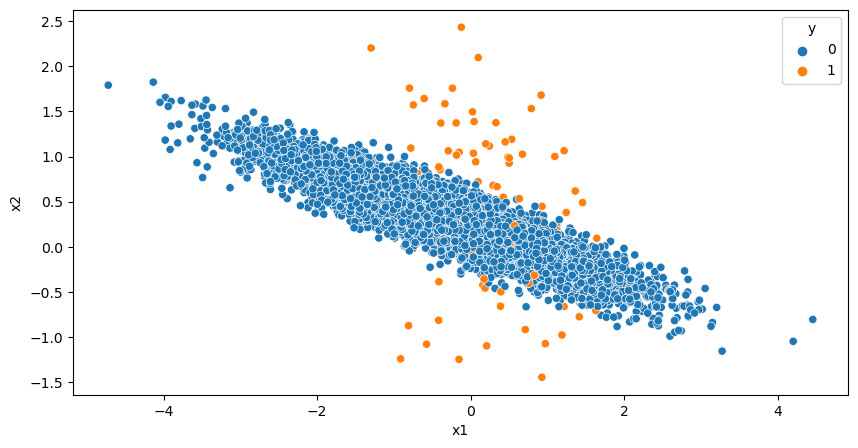

In [28]:
# scatter plot
plt.figure(figsize=(10,5))

sns.scatterplot(data=df, x='x1', y='x2', hue='y');

In [14]:
# import model and matrics
from sklearn.linear_model import LogisticRegression

In [30]:
# split dataset into x,y
X = df.drop('y',axis=1)
y = df['y']

In [11]:
from sklearn.model_selection import train_test_split

In [32]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

In [33]:
# define model
lg1 = LogisticRegression(class_weight='balanced')

# fit it
lg1.fit(X_train,y_train)

# test
y_pred = lg1.predict(X_test)

In [17]:
from sklearn import metrics

In [35]:
metrics.accuracy_score(y_test, y_pred)

0.658

In [36]:
metrics.confusion_matrix(y_test, y_pred)

array([[1955, 1016],
       [  10,   19]], dtype=int64)

##### 2. credit card fraud data


In [4]:
location = r'D:\AI-DATASETS\02-MISC-large\creditcard.csv'

In [5]:
df = pd.read_csv(location)

In [6]:
df.shape

(284807, 31)

In [7]:
df.sample(4)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
139288,83090.0,-0.688484,0.221793,0.905957,-3.132575,2.041943,3.517382,-0.090434,0.882966,1.267209,...,-0.116153,-0.040696,-0.438283,1.003612,0.706922,-0.770105,0.193329,-0.091838,1.00,0
118418,75072.0,0.927378,-0.078677,1.410489,2.795473,-0.910022,0.185084,-0.430039,0.145772,0.118069,...,-0.025740,-0.159272,-0.043046,0.388774,0.255642,-0.054160,0.022652,0.053374,102.88,0
147229,88262.0,0.000182,0.692655,-0.729351,0.012807,1.158958,-0.785286,0.721158,-0.219488,0.220201,...,0.051891,0.391619,-0.224099,-0.771866,-0.446734,0.615339,-0.024036,0.147780,16.98,0
205518,135789.0,-0.441553,-0.897497,0.320113,-3.004265,0.635080,1.488301,-0.644665,0.516131,-2.112087,...,0.011347,0.386417,-0.049601,-0.991388,-0.505050,-0.132590,0.039725,0.194576,20.00,0


In [8]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [9]:
# split dataset into x,y
X = df.drop('Class',axis=1)
y = df['Class']

In [12]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

In [15]:
# define model
lg1 = LogisticRegression(max_iter=1000)

# fit it
lg1.fit(X_train,y_train)

# test
y_pred = lg1.predict(X_test)

In [18]:
metrics.accuracy_score(y_test, y_pred)

0.9991222218320986

In [19]:
metrics.confusion_matrix(y_test, y_pred)

array([[85292,    15],
       [   60,    76]], dtype=int64)